## Prédictions de 'Occupation' par LogisticRegression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

Charger et compléter les données

In [50]:
data = pd.read_csv("data/adult.csv", na_values='?')
data.drop('income', axis=1, inplace=True)

In [51]:
def clean_and_complete(data):
    # complete
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data['workclass'] = imp.fit_transform(data[['workclass']])
    data['native.country'] = imp.fit_transform(data[['native.country']])
    # remove useless info
    data.drop('education', axis=1, inplace=True)

In [52]:
clean_and_complete(data)

In [53]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


Préparer les données pour le modèle

In [55]:
def transform(data):
    data['native.country'] = [1 if x == 'United-States' else 0 for x in data['native.country']]
    data['workclass'] = [1 if x == 'Private' else 0 for x in data['workclass']]
    data['race'] = [1 if x == 'White' else 0 for x in data['race']]
    data['sex'] = [1 if x == 'Male' else 0 for x in data['sex']]

In [56]:
transform(data)

In [57]:
def train_set(data):
    return data.dropna()

In [58]:
train = train_set(data)

In [59]:
def prediction_set(data):
    return data[data['occupation'].isnull()].drop('occupation', axis=1)

In [60]:
prediction = pd.get_dummies(prediction_set(data))

In [61]:
train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,1,132870,9,Widowed,Exec-managerial,Not-in-family,1,0,0,4356,18,1
3,54,1,140359,4,Divorced,Machine-op-inspct,Unmarried,1,0,0,3900,40,1
4,41,1,264663,10,Separated,Prof-specialty,Own-child,1,0,0,3900,40,1
5,34,1,216864,9,Divorced,Other-service,Unmarried,1,0,0,3770,45,1
6,38,1,150601,6,Separated,Adm-clerical,Unmarried,1,1,0,3770,40,1


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 13 columns):
age               30718 non-null int64
workclass         30718 non-null int64
fnlwgt            30718 non-null int64
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null int64
sex               30718 non-null int64
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null int64
dtypes: int64(10), object(3)
memory usage: 3.3+ MB


In [63]:
prediction.head()

,age,workclass,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week,native.country,...,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,90,1,77053,9,1,0,0,4356,40,1,...,0,0,0,1,0,1,0,0,0,0
2,66,1,186061,10,0,0,0,4356,40,1,...,0,0,0,1,0,0,0,0,1,0
14,51,1,172175,16,1,1,0,2824,40,1,...,0,1,0,0,0,1,0,0,0,0
24,61,1,135285,9,1,1,0,2603,32,1,...,0,0,0,0,1,0,0,0,0,0
44,71,1,100820,9,1,1,0,2489,15,1,...,0,0,0,0,1,0,0,0,0,0


In [64]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 32544
Data columns (total 23 columns):
age                                     1843 non-null int64
workclass                               1843 non-null int64
fnlwgt                                  1843 non-null int64
education.num                           1843 non-null int64
race                                    1843 non-null int64
sex                                     1843 non-null int64
capital.gain                            1843 non-null int64
capital.loss                            1843 non-null int64
hours.per.week                          1843 non-null int64
native.country                          1843 non-null int64
marital.status_Divorced                 1843 non-null uint8
marital.status_Married-AF-spouse        1843 non-null uint8
marital.status_Married-civ-spouse       1843 non-null uint8
marital.status_Married-spouse-absent    1843 non-null uint8
marital.status_Never-married            1843 non-nul

Modèle de prédiction

In [65]:
X = pd.get_dummies(train.drop('occupation', axis=1))
Y = train['occupation']
clf = LogisticRegression()
clf.fit(X, Y)
result = clf.predict(prediction)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [66]:
prediction['occupation']=[x for x in result]

In [67]:
# Calcul du score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy') #accuracy, f1
np.mean(scores),np.std(scores)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

(0.17022502092483452, 0.014435648316369084)

Evaluation de la prédiction

In [68]:
def complete_with_prediction(data, prediction):
    complete_data = data.copy()
    for index in prediction.index:
        complete_data.loc[index,'occupation'] = prediction.loc[index,'occupation']
    return complete_data

In [69]:
df = complete_with_prediction(data, prediction)

Visualisation

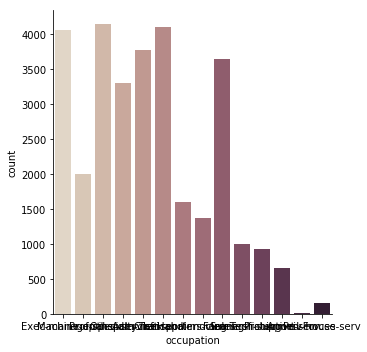

In [152]:
sns.catplot(x="occupation", kind="count", palette="ch:.25", data=data) # Données brutes

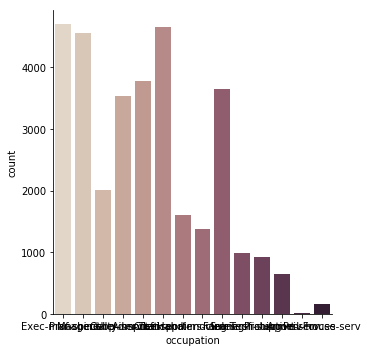

In [153]:
sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df) # Données complétées

In [127]:
total = data.groupby('occupation').count()['age']
percent = round(data.groupby('occupation').count()['age']/data.dropna()['age'].count(),6)*100
stats_ini = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# stats_ini.loc[len(stats_ini)]=[sum(stats_ini['Total']),sum(stats_ini['Percent'])]

In [128]:
total = df.groupby('occupation').count()['age']
percent = round(df.groupby('occupation').count()['age']/df['age'].count(),6)*100
stats_fin = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# stats_fin.loc[len(stats_fin)]=[sum(stats_fin['Total']),sum(stats_fin['Percent'])]

In [129]:
stats_ini

,Total,Percent
occupation,,
Adm-clerical,3770,12.2729
Armed-Forces,9,0.0293
Craft-repair,4099,13.3440
Exec-managerial,4066,13.2365
Farming-fishing,994,3.2359
Handlers-cleaners,1370,4.4599
Machine-op-inspct,2002,6.5174
Other-service,3295,10.7266
Priv-house-serv,149,0.4851


In [130]:
stats_fin

,Total,Percent
occupation,,
Adm-clerical,3777,11.5998
Armed-Forces,9,0.0276
Craft-repair,4651,14.2840
Exec-managerial,4698,14.4283
Farming-fishing,994,3.0527
Handlers-cleaners,1370,4.2075
Machine-op-inspct,2002,6.1485
Other-service,3533,10.8504
Priv-house-serv,151,0.4637


#### Comparaison des données initiales et des données enrichies :
Après enrichissement, on a plus de :
- craft-repair
- exec-managerial

Et on a moins de :
- sales
- transport moving
- adm-clerical


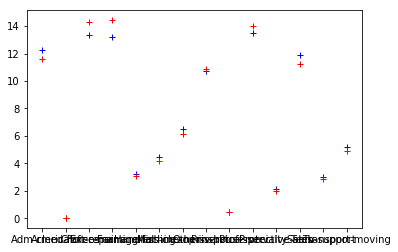

In [150]:
# Comparaison en pourcentage
fig = plt.figure()
plt.plot(stats_ini.index, stats_ini['Percent'],'b+')  # en bleu : données brutes
plt.plot(stats_fin.index, stats_fin['Percent'],'r+')  # en rouge : données complétées par les prédictions
plt.show()

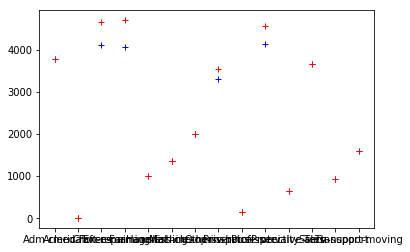

In [151]:
# Comparaison en nombre
fig = plt.figure()
plt.plot(stats_ini.index, stats_ini['Total'],'b+')  # en bleu : données brutes
plt.plot(stats_fin.index, stats_fin['Total'],'r+')  # en rouge : données complétées par les prédictions
plt.show()